
#  Visualizing goodness of fit


##  Assignment 

The **chi-square goodness of fit test** compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the `late_shipments` dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

- `CIP`: 0.05
- `DDP`: 0.1
- `EXW`: 0.75
- `FCA`: 0.1

These frequencies are stored in the `hypothesized` DataFrame.

The `incoterm_counts` DataFrame stores the `.value_counts()` of the `vendor_inco_term` column.

`late_shipments` is available; `pandas` and `matplotlib.pyplot` are loaded with their standard aliases.

##  Pre exercise code 

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
late_shipments = pd.read_feather(
  path = "/usr/local/share/datasets/late_shipments.feather"
)
late_shipments['freight_cost_group'] = np.where(late_shipments['freight_cost_usd'] <= 5000, "reasonable", "expensive")
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != "DDU"]

hypothesized = pd.DataFrame({
  'vendor_inco_term': ['EXW', 'CIP', 'DDP', 'FCA'], 
  'prop': [0.75, 0.05, 0.1, 0.1]}).sort_values('vendor_inco_term')

incoterm_counts = late_shipments['vendor_inco_term'].value_counts().rename_axis('vendor_inco_term').reset_index(name='n').sort_values('vendor_inco_term')
```

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
late_shipments = pd.read_feather(
  path = "late_shipments.feather"
)
late_shipments['freight_cost_group'] = np.where(late_shipments['freight_cost_usd'] <= 5000, "reasonable", "expensive")
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != "DDU"]

hypothesized = pd.DataFrame({
  'vendor_inco_term': ['EXW', 'CIP', 'DDP', 'FCA'], 
  'prop': [0.75, 0.05, 0.1, 0.1]}).sort_values('vendor_inco_term')

incoterm_counts = late_shipments['vendor_inco_term'].value_counts().rename_axis('vendor_inco_term').reset_index(name='n').sort_values('vendor_inco_term')



##  Instructions 

- Find the total number of rows in `late_shipments`.


In [51]:
n = len(late_shipments)
n

999


- Add a column named `n` to the `hypothesized` DataFrame that is the `hypothesized` `prop` column times `n_total`.


In [52]:
hypothesized['n'] = hypothesized['prop'] * n
hypothesized

,vendor_inco_term,prop,n
1,CIP,0.05,49.95
2,DDP,0.10,99.90
0,EXW,0.75,749.25
3,FCA,0.10,99.90


- Create a bar graph of `'n'` versus `'vendor_inco_term'` for the `incoterm_counts` data, specifying a red color.


<BarContainer object of 4 artists>

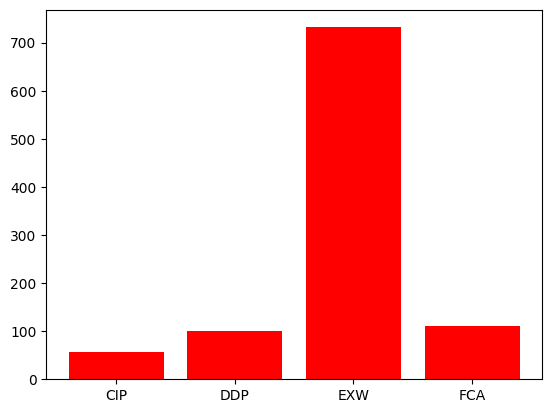

In [53]:
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")


- Add blue bars to the plot showing the same results from the `hypothesized` DataFrame, specifying an `alpha` of `0.5`.


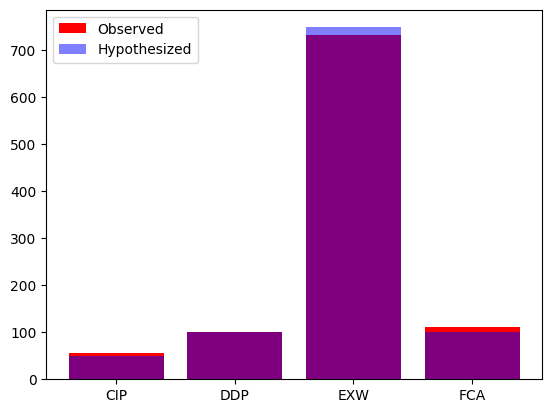

In [55]:
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()